Importing Neccesssary  Libraries

In [1]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection  import train_test_split
from scipy.stats import norm 
from scipy import stats, integrate
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

Importing Dataset

In [2]:
#Our dataset is in a form of csv file
#reading .csv file using pandas.

#raw_data = pd.read_csv(r'file_path/file_name.csv')
raw_data = pd.read_csv(r'C:/Users/patel/OneDrive/Desktop/gbc sem2/capstone/Nishant/KSI_CLEAN.csv/KSI_CLEAN.csv')
raw_data

,ACCNUM,YEAR,MONTH,DAY,HOUR,MINUTES,WEEKDAY,LATITUDE,LONGITUDE,Ward_Name,...,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL
0,1249781,2011,8,4,23,18,3,43.651545,-79.383490,Toronto Centre-Rosedale (27),...,0,1,0,0,0,0,0,0,0,0
1,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0
2,5002235651,2015,12,30,23,39,2,43.682342,-79.328266,Toronto-Danforth (30),...,0,0,0,0,0,1,0,0,0,1
3,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0
4,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),...,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12552,1291534,2012,3,2,18,12,4,43.663245,-79.367590,Toronto Centre-Rosedale (28),...,0,0,0,0,1,1,0,0,0,0
12553,1291534,2012,3,2,18,12,4,43.663245,-79.367590,Toronto Centre-Rosedale (28),...,0,0,0,0,1,1,0,0,0,0
12554,1291534,2012,3,2,18,12,4,43.663245,-79.367590,Toronto Centre-Rosedale (28),...,0,0,0,0,1,1,0,0,0,0
12555,6001157650,2016,7,2,18,12,5,43.645874,-79.363430,Toronto Centre-Rosedale (28),...,0,0,0,1,1,1,0,0,0,1


Checking for Missing Values

In [3]:
clean_df = raw_data.replace(' ', np.nan, regex=False)
print(clean_df.isna().sum()/len(clean_df)*100)          #printing percentage of missing values for each feature

ACCNUM            0.000000
YEAR              0.000000
MONTH             0.000000
DAY               0.000000
HOUR              0.000000
MINUTES           0.000000
WEEKDAY           0.000000
LATITUDE          0.000000
LONGITUDE         0.000000
Ward_Name         0.000000
Ward_ID           0.000000
Hood_Name         0.000000
Hood_ID           0.000000
Division          0.000000
District          0.007964
STREET1           0.000000
STREET2           8.473361
OFFSET           88.428765
ROAD_CLASS        0.000000
LOCCOORD          0.676913
ACCLOC           37.508959
TRAFFCTL          0.191128
VISIBILITY        0.015927
LIGHT             0.015927
RDSFCOND          0.055746
ACCLASS           0.000000
IMPACTYPE         0.000000
INVTYPE           0.031855
INVAGE            0.000000
INJURY           11.722545
FATAL_NO          0.000000
INITDIR          30.166441
VEHTYPE          13.594011
MANOEUVER        43.346341
DRIVACT          50.617186
DRIVCOND         50.641077
PEDTYPE          83.937246
P

Visualizing the features having maximum missing values

<AxesSubplot: >

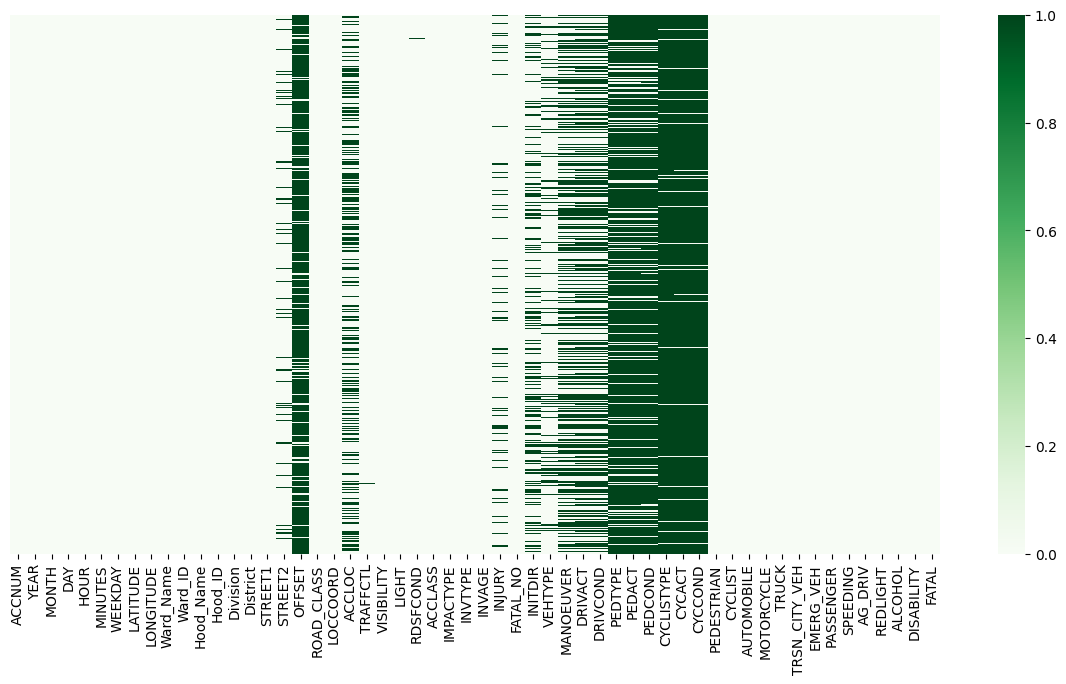

In [4]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(clean_df.isnull(), yticklabels=False,cmap='Greens')       #heatmap to visualize features with most missing values

Lets try to understand that what causes of accidents resulted in Fatal incidents (involving 1 or more deaths). To do the first lets get the unique values of fatal incidents in a seperate df and then do the analysis.

Data cleaning by dropping columns with large amount of missing value from heat map

In [5]:
## Dropping columns where missing values were greater than 80%
#here temp_df act as a backup dataframe to do analysis 

temp_df = clean_df.drop(["PEDTYPE", "PEDACT", "PEDCOND", "CYCLISTYPE", "CYCACT", "CYCCOND", "OFFSET"], axis=1)
temp_df.shape

(12557, 49)

Changing the property damage and non-fatal columns to Non-Fatal

In [6]:
temp_df['ACCLASS'] = np.where(temp_df['ACCLASS'] == 'Property Damage Only', 'Non-Fatal', temp_df['ACCLASS'])
temp_df['ACCLASS'] = np.where(temp_df['ACCLASS'] == 'Non-Fatal Injury', 'Non-Fatal', temp_df['ACCLASS'])
temp_df.ACCLASS.unique()

array(['Non-Fatal', 'Fatal'], dtype=object)

In [7]:
# Verifying columns with object data type
print(temp_df.select_dtypes(["object"]).columns)

Index(['Ward_Name', 'Hood_Name', 'Division', 'District', 'STREET1', 'STREET2',
       'ROAD_CLASS', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT',
       'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND'],
      dtype='object')


Data cleaning by changing data type

In [8]:
##changing all object data types to category 
objdtype_cols = temp_df.select_dtypes(["object"]).columns
temp_df[objdtype_cols] = temp_df[objdtype_cols].astype('category')

In [9]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12557 entries, 0 to 12556
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ACCNUM         12557 non-null  int64   
 1   YEAR           12557 non-null  int64   
 2   MONTH          12557 non-null  int64   
 3   DAY            12557 non-null  int64   
 4   HOUR           12557 non-null  int64   
 5   MINUTES        12557 non-null  int64   
 6   WEEKDAY        12557 non-null  int64   
 7   LATITUDE       12557 non-null  float64 
 8   LONGITUDE      12557 non-null  float64 
 9   Ward_Name      12557 non-null  category
 10  Ward_ID        12557 non-null  int64   
 11  Hood_Name      12557 non-null  category
 12  Hood_ID        12557 non-null  int64   
 13  Division       12557 non-null  category
 14  District       12556 non-null  category
 15  STREET1        12557 non-null  category
 16  STREET2        11493 non-null  category
 17  ROAD_CLASS     12557 non-null  

Data Analyis Part  

Data relationship exploration
Accident numbers against month and year

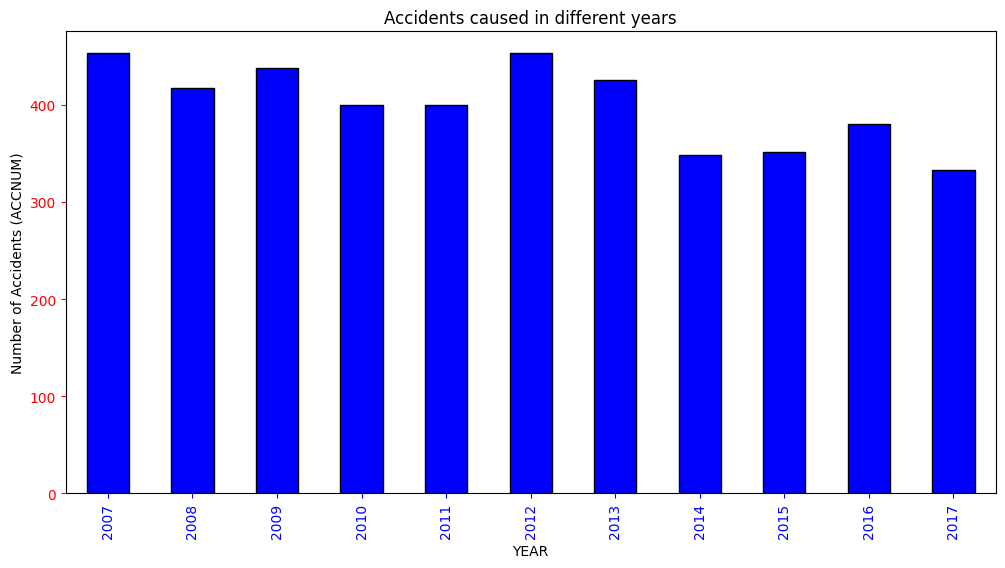

In [10]:
#Plotting Number of accidents by Year
Num_accident = temp_df.groupby('YEAR')['ACCNUM'].nunique()
plt.figure(figsize=(12,6))
plt.title("Accidents caused in different years")
plt.ylabel('Number of Accidents (ACCNUM)')

ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
my_colors = list('rgbkymc')   #red, green, blue, black, etc.
Num_accident.plot(
    kind='bar', 
    color='blue',
    edgecolor='black'
)
plt.show()

Insights: Total number of incidents have reduced slightly over the years.

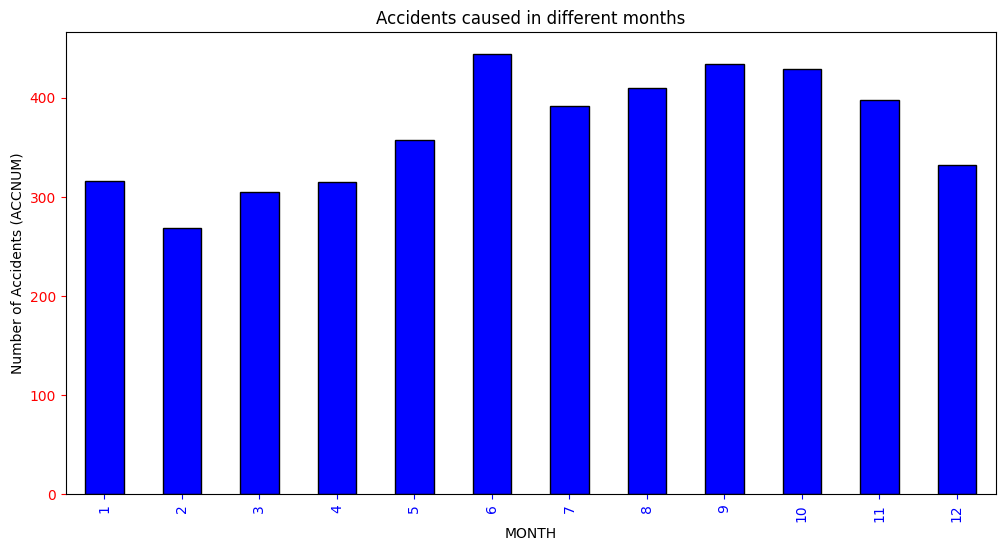

In [11]:
#Number of Unique accidents by Year
Num_accident = clean_df.groupby('MONTH')['ACCNUM'].nunique()
plt.figure(figsize=(12,6))
plt.title("Accidents caused in different months")
plt.ylabel('Number of Accidents (ACCNUM)')



ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
my_colors = list('rgbkymc')   #red, green, blue, black, etc.
Num_accident.plot(
    kind='bar', 
    color='blue',
    edgecolor='black'
)
#Num_accident.plot(kind='bar',color= my_colors)
plt.show()

Insights: Accidents happened more from June to October

In [12]:
#only run this cell once to install Folium
#%pip install folium

In [13]:
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn import tree, metrics
from scipy.stats import norm 
from scipy import stats, integrate
import matplotlib.pyplot as plt
from IPython.display import HTML
import folium
from folium.plugins import HeatMap
from math import sqrt

Creating a Heatmap of where Fatality happened (Injury == Fatal)

In [14]:
df = temp_df[temp_df['INJURY'] == 'Fatal']
df = df[['LATITUDE', 'LONGITUDE', 'FATAL']]
lat_Toronto = temp_df.describe().at['mean','LATITUDE']
lng_Toronto = temp_df.describe().at['mean','LONGITUDE']
#Fatal_map = folium.Map(location = [lat_Toronto, lng_Toronto], zoom_start=5)
Toronto_location = [lat_Toronto, lng_Toronto]
#Toronto_location = [43.6532, -79.3832]

Fatal_map = folium.Map(Toronto_location, zoom_start=10.255)
HeatMap(df.values, min_opacity =0.3).add_to(Fatal_map)
Fatal_map

ACCLASS VS Fatal VS injury --- looking for target column (FATAL)
ACCLASS is columns that classified into 3 catergory while fatal only show whether is fatal.

1.In general column ACCLASS and FATAL both show same pattern.

2.Injury miss a lot of information thus not very meaningful to be the target column

As Fatal column was already in int type and quite similar to ACCLASS, we will be using it as output in data modeling later

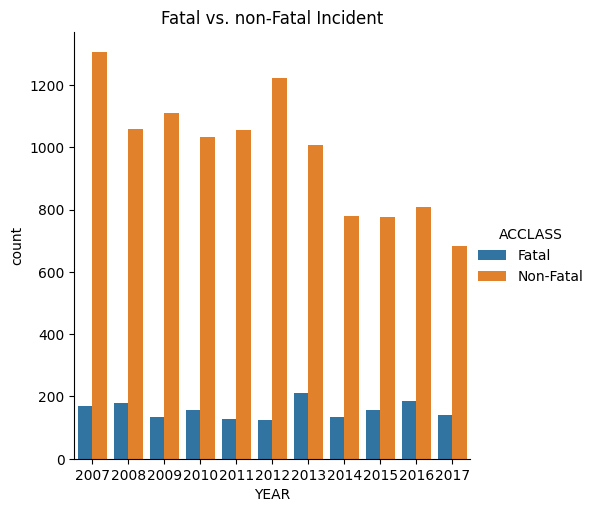

In [15]:
#Categorizing Fatal vs. non-Fatal Incident (non-unique i.e: one accident is counted depending upon involved parties)

sns.catplot(x='YEAR', kind='count', data=temp_df,  hue='ACCLASS').set(title='Fatal vs. non-Fatal Incident')

Insight: From 2007 to 2017, the numbers of non-fatal accident declined while those occurance of fatal accident kept unchanged

------------------------------------------------------------------------------------------------------------------------------

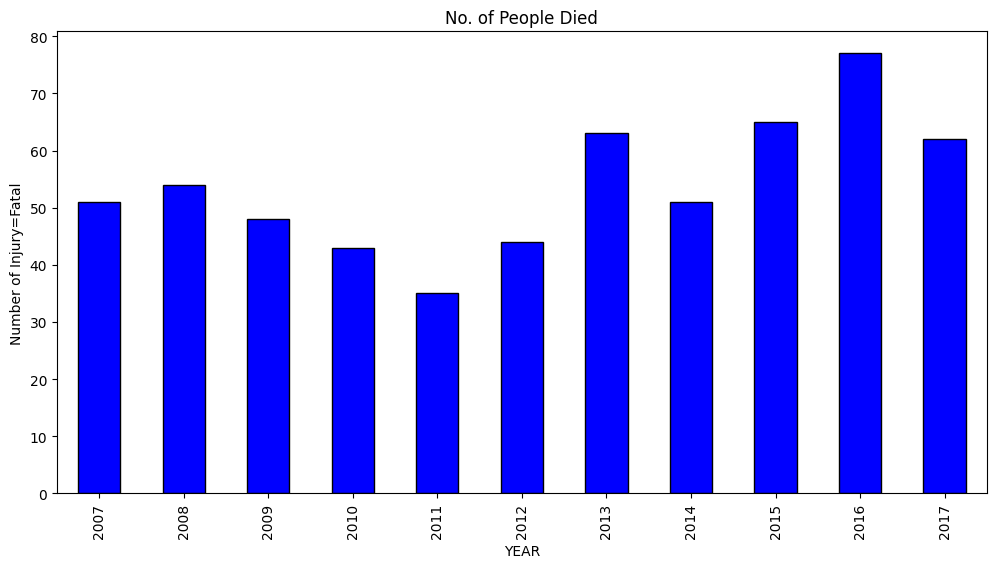

In [16]:
#Lets look at Fatality over years (NO. of people died)
Fatality = temp_df[temp_df['INJURY'] =='Fatal']
Fatality = Fatality.groupby(temp_df['YEAR']).count()
plt.figure(figsize=(12,6))
plt.title("No. of People Died")


plt.ylabel('Number of Injury=Fatal')
Fatality['INJURY'].plot(kind='bar',color="blue" , edgecolor='black')

plt.show()

Insights: From above plot we can see that Fatal injury was highest in 2016

Here we have considered ACCCLASS=FATAL

Pattern of Accident occurance with respect to Regions

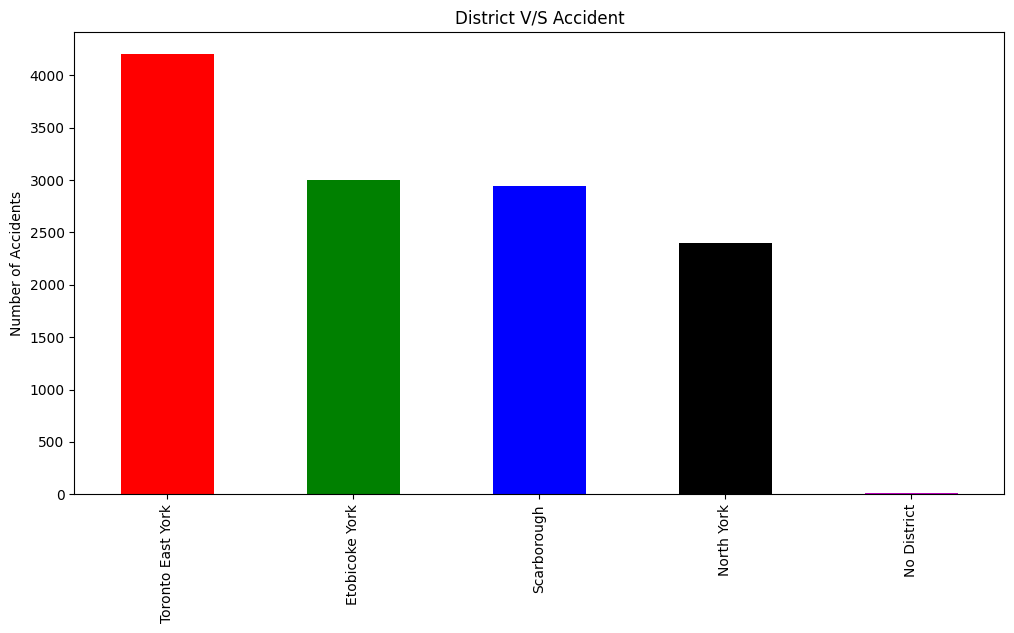

In [17]:
#Looking at area or District where accident happens
Region_KSI_CLEAN = temp_df['District'].value_counts()
plt.figure(figsize=(12,6))
plt.ylabel('Number of Accidents')
plt.title('District V/S Accident')
Region_KSI_CLEAN.plot(kind='bar',color=list('rgbkmc') )
plt.show()

Insights: Here we can see that Toronto East York has the most acccidents

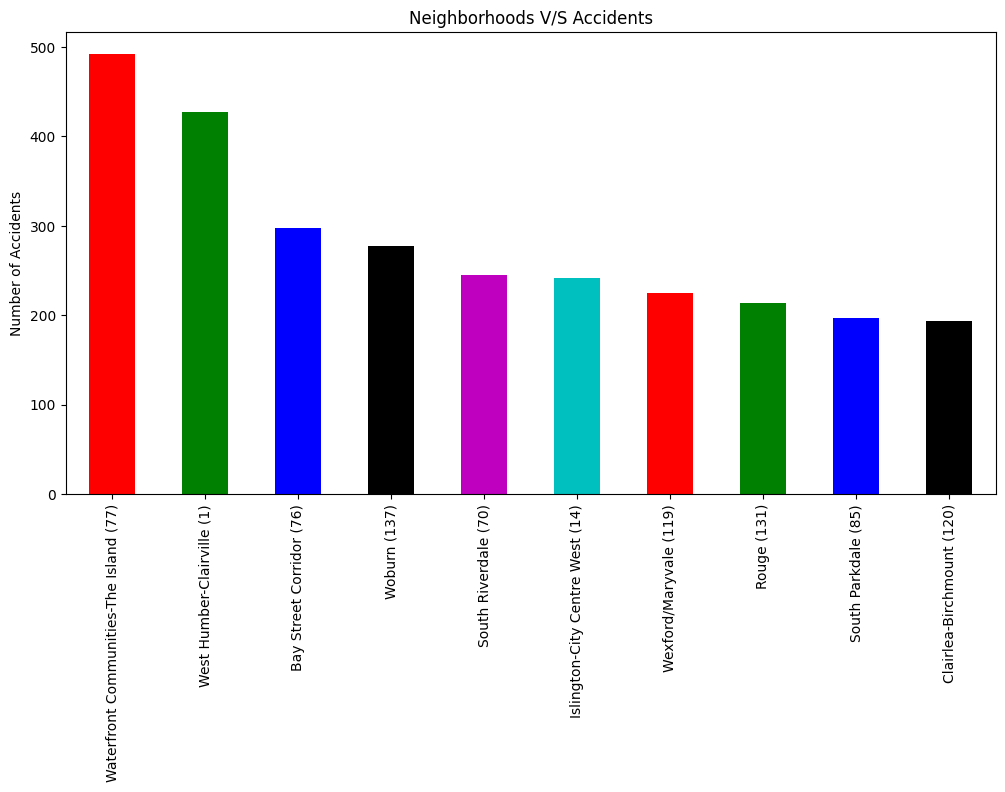

In [18]:
Hood_KSI_CLEAN = temp_df['Hood_Name'].value_counts()
plt.figure(figsize=(12,6))
plt.ylabel('Number of Accidents')
plt.title('Neighborhoods V/S Accidents')
Hood_KSI_CLEAN.nlargest(10).plot(kind='bar',color=list('rgbkmc') )
plt.show()

Insights: Waterfront Communities neighbourhood has most accidents

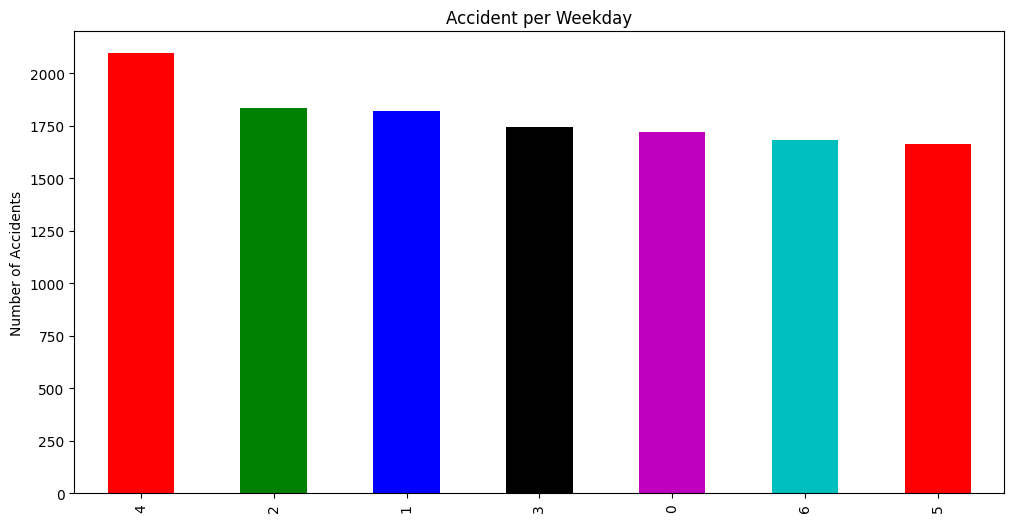

In [19]:
#Visualising pattern of accidents inrespect to weekday
Weekday_KSI_CLEAN = temp_df['WEEKDAY'].value_counts()
plt.figure(figsize=(12,6))
plt.ylabel('Number of Accidents')
plt.title("Accident per Weekday")
Weekday_KSI_CLEAN.plot(kind='bar',color=list('rgbkmc') )
plt.show()

Insights: This is the graph of distribution of day of the week. 
It shows thrusday has most number of accidents.

Type of Driving Condition at the time of Accident

Text(0.5, 0, 'Driving condition VS Accidents')

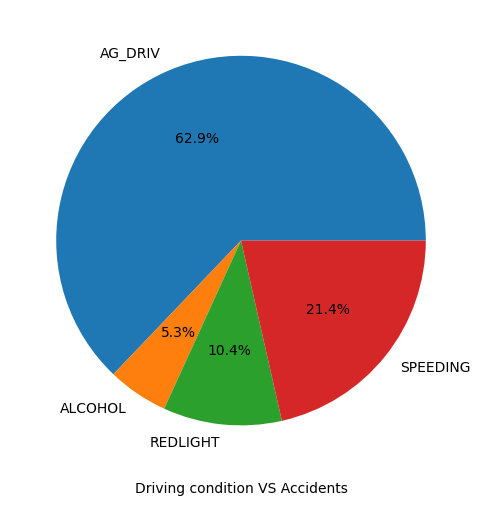

In [20]:
## Driving condition VS accident #
## creating a pivot table for accidents causing by 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL'  for EDA.
KSI_pivot_cause = temp_df.pivot_table(index='YEAR', 
                           values = ['SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL'],
                           aggfunc=np.sum,
                           margins = True,
                           margins_name = 'Total Under Category')
fig, ax1 = plt.subplots(figsize=(6,6))
KSI_pivot_cause.iloc[11].plot(kind='pie', ax=ax1, autopct='%3.1f%%',fontsize=10)
ax1.set_ylabel('')
ax1.set_xlabel('Driving condition VS Accidents',fontsize=10)

Different Causes responsible for Accidents

Text(0, 0.5, 'Accidents')

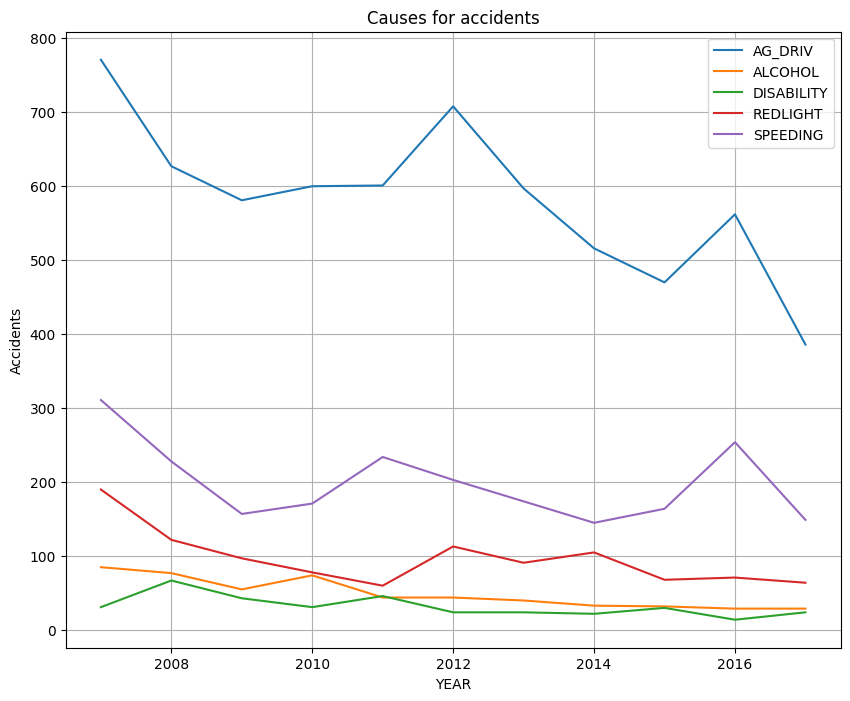

In [21]:
#Causes for Fatal in line graph
Cause_Fatal = temp_df.pivot_table(index='YEAR', margins=False ,values=['ALCOHOL', 'AG_DRIV', 'SPEEDING','REDLIGHT','DISABILITY'],aggfunc=np.sum)
Cause_Fatal.plot(figsize=(10,8), title="Causes for accidents", grid=True)
plt.ylabel('Accidents')

Type of Vehicle involved in Accidents

Text(0.5, 0, 'Vechile type VS Accidents')

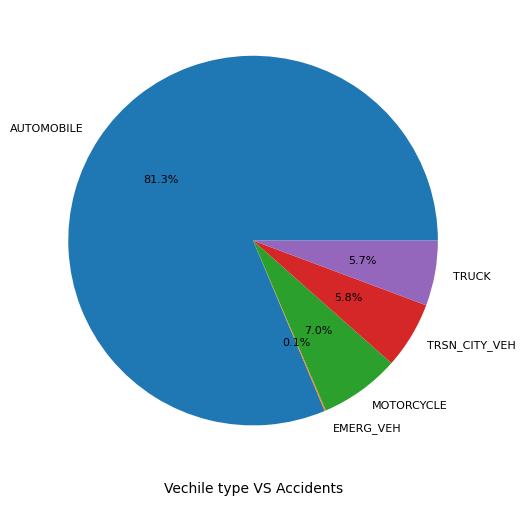

In [22]:
## vechile type VS accident #
## creating a pivot table for accidents causing by 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH'   in 10 years
KSI_pivot_Types = temp_df.pivot_table(index='YEAR', 
                           values = [ 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH' ],
                           aggfunc=np.sum,
                           margins = True,
                           margins_name = 'Total Under Category')

fig, ax1 = plt.subplots(figsize=(6,6))
KSI_pivot_Types.iloc[11].plot(kind='pie', ax=ax1, autopct='%3.1f%%',fontsize=8)
ax1.set_ylabel('')
ax1.set_xlabel('Vechile type VS Accidents',fontsize=10)

Text(0, 0.5, 'Vehicles')

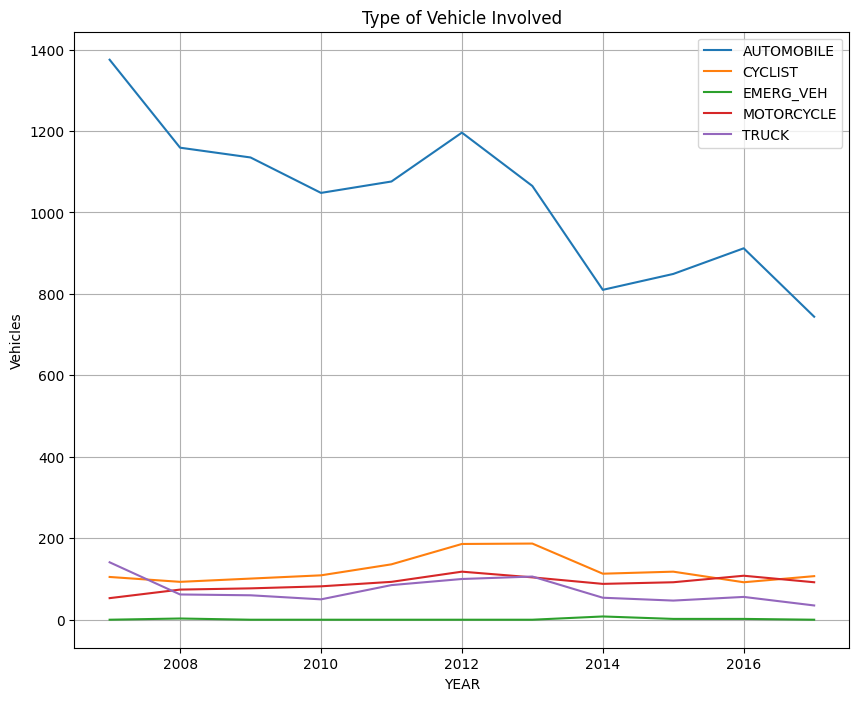

In [23]:
#Type of vehicles involved
Veh_involved = temp_df.pivot_table(index='YEAR',values=['AUTOMOBILE', 'CYCLIST', 'EMERG_VEH', 'MOTORCYCLE', 'TRUCK'],aggfunc=np.sum)
Veh_involved.plot(figsize=(10,8), title="Type of Vehicle Involved", grid=True)
plt.ylabel('Vehicles')

Types of Victims Involved 

Text(0.5, 0, 'Victims VS Accidents')

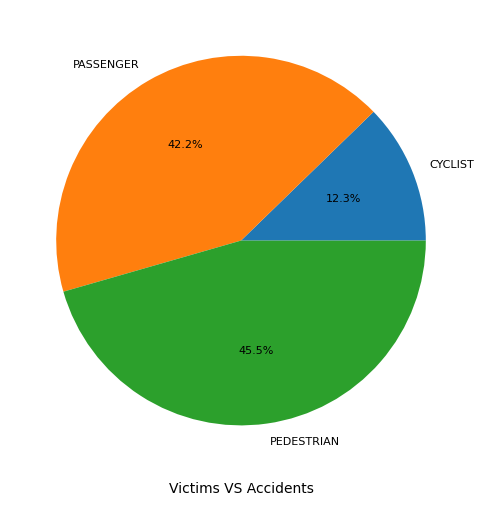

In [24]:
## Victims VS accident #
## creating a pivot table for Victims by 'CYCLIST','PEDESTRIAN','PASSENGER' 
KSI_pivot_CPP = temp_df.pivot_table(index='YEAR', 
                           values = [ 'CYCLIST','PEDESTRIAN','PASSENGER' ],
                           aggfunc=np.sum,
                           margins = True,
                           margins_name = 'Total Under Category')
fig, ax1 = plt.subplots(figsize=(6,6))
KSI_pivot_CPP.iloc[11].plot(kind='pie', ax=ax1, autopct='%3.1f%%',fontsize=8)
ax1.set_ylabel('')
ax1.set_xlabel('Victims VS Accidents',fontsize=10)

Result of Accident: Fatal or Disability


Note: Here we will see higher no. of Fatal accidents, bcoz. we have consider Injury = Fatal in previous steps.

Text(0.5, 0, 'Total Accidents in last 10 years')

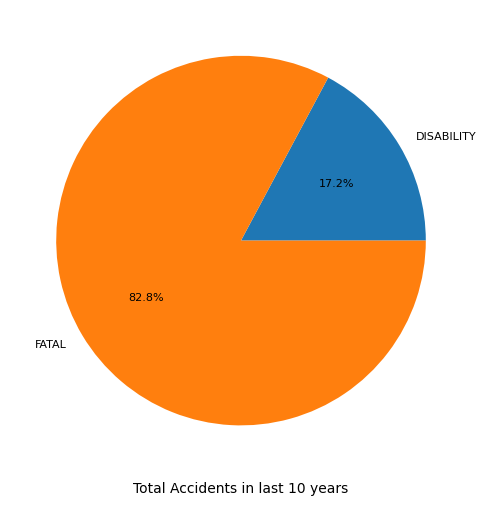

In [25]:
## creating a pivot table for 'FATAL','DISABILITY' against accidents #
KSI_pivot_DF = temp_df.pivot_table(index='YEAR', 
                           values = [ 'FATAL','DISABILITY' ],
                           aggfunc=np.sum,
                           margins = True,
                           margins_name = 'Total Under Category')
fig, ax1 = plt.subplots(figsize=(6,6))
KSI_pivot_DF.iloc[11].plot(kind='pie', ax=ax1, autopct='%3.1f%%',fontsize=8)
ax1.set_ylabel('')
ax1.set_xlabel('Total Accidents in last 10 years',fontsize=10)

Number of Accidents occured inrespective to Month and Year 

C:\Users\patel\AppData\Local\Temp\ipykernel_14180\3627517509.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = temp_df.groupby(by=['YEAR', 'MONTH'],as_index=False).sum()
C:\Users\patel\AppData\Local\Temp\ipykernel_14180\3627517509.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data = data.pivot('MONTH','YEAR','FATAL')


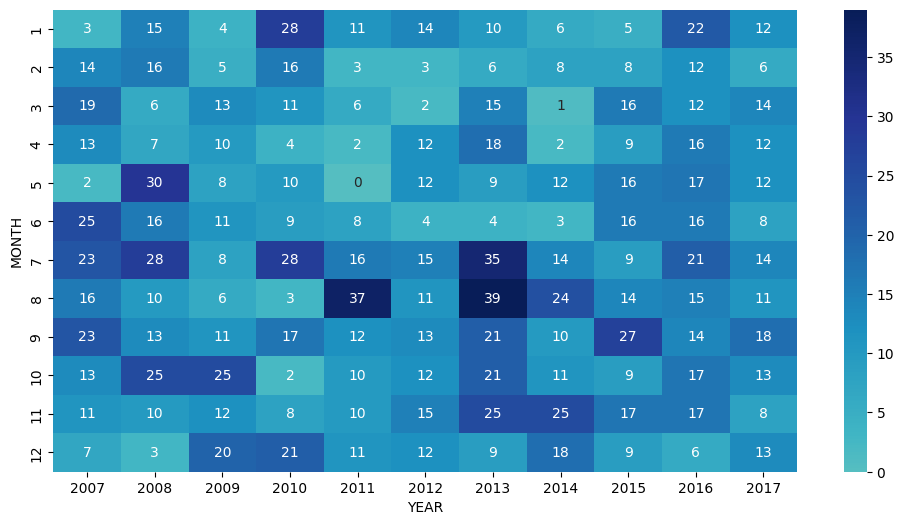

In [26]:
data = temp_df.groupby(by=['YEAR', 'MONTH'],as_index=False).sum()
data = data.pivot('MONTH','YEAR','FATAL')
plt.figure(figsize=(12,6))
sns.heatmap(data, center=data.loc[1, 2007], annot=True, fmt="d", cmap="YlGnBu")
plt.show()

Insights: Here we can see that August 2013 has maximum fatal accidents

Data Modeling Section:


Here we are doing clustering  with k-means algorithm. the aim of the clustering process is to segregate groups with similar traits and assign them into clusters.

In [27]:
#Data preparation for modeling by checking null value, get dummies
temp_df.shape

(12557, 49)

In [28]:
temp_df.columns

Index(['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Ward_Name', 'Ward_ID', 'Hood_Name', 'Hood_ID',
       'Division', 'District', 'STREET1', 'STREET2', 'ROAD_CLASS', 'LOCCOORD',
       'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS',
       'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR',
       'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'FATAL'],
      dtype='object')

In [29]:
#datatypes
temp_df.dtypes

ACCNUM              int64
YEAR                int64
MONTH               int64
DAY                 int64
HOUR                int64
MINUTES             int64
WEEKDAY             int64
LATITUDE          float64
LONGITUDE         float64
Ward_Name        category
Ward_ID             int64
Hood_Name        category
Hood_ID             int64
Division         category
District         category
STREET1          category
STREET2          category
ROAD_CLASS       category
LOCCOORD         category
ACCLOC           category
TRAFFCTL         category
VISIBILITY       category
LIGHT            category
RDSFCOND         category
ACCLASS          category
IMPACTYPE        category
INVTYPE          category
INVAGE           category
INJURY           category
FATAL_NO            int64
INITDIR          category
VEHTYPE          category
MANOEUVER        category
DRIVACT          category
DRIVCOND         category
PEDESTRIAN          int64
CYCLIST             int64
AUTOMOBILE          int64
MOTORCYCLE  

Here we are droping number of columns as they are overlapping/having missing value/not related to our study.

Those Coloumns are:  'ACCLOC', 'Ward_Name', 'Ward_ID', 'Hood_Name', 'Hood_ID', 'Division', 'STREET1', 'STREET2', 'ROAD_CLASS', 'LOCCOOR','TRAFFCTL', 'ACCLOC', 'RDSFCOND', 'ACCLASS','IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND' 'ACCLASS',

In [30]:
#Creating separate df 
df=temp_df[['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE',  'Hood_ID',
        'District',  
         'VISIBILITY', 'LIGHT', 'RDSFCOND', 
        'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']]

In [31]:
df.dtypes

ACCNUM              int64
YEAR                int64
MONTH               int64
DAY                 int64
HOUR                int64
MINUTES             int64
WEEKDAY             int64
LATITUDE          float64
LONGITUDE         float64
Hood_ID             int64
District         category
VISIBILITY       category
LIGHT            category
RDSFCOND         category
PEDESTRIAN          int64
CYCLIST             int64
AUTOMOBILE          int64
MOTORCYCLE          int64
TRUCK               int64
TRSN_CITY_VEH       int64
EMERG_VEH           int64
PASSENGER           int64
SPEEDING            int64
AG_DRIV             int64
REDLIGHT            int64
ALCOHOL             int64
DISABILITY          int64
dtype: object

In [32]:
#changing datatypes from float to int
df['LATITUDE']=df['LATITUDE'].astype('int')
df['LONGITUDE']=df['LATITUDE'].astype('int')

C:\Users\patel\AppData\Local\Temp\ipykernel_14180\3218677247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LATITUDE']=df['LATITUDE'].astype('int')
C:\Users\patel\AppData\Local\Temp\ipykernel_14180\3218677247.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LONGITUDE']=df['LATITUDE'].astype('int')


In [33]:
print("Percentage of missing values in the KSI_CLEAN_data dataset")
df.isna().sum()/len(df)*100

Percentage of missing values in the KSI_CLEAN_data dataset


ACCNUM           0.000000
YEAR             0.000000
MONTH            0.000000
DAY              0.000000
HOUR             0.000000
MINUTES          0.000000
WEEKDAY          0.000000
LATITUDE         0.000000
LONGITUDE        0.000000
Hood_ID          0.000000
District         0.007964
VISIBILITY       0.015927
LIGHT            0.015927
RDSFCOND         0.055746
PEDESTRIAN       0.000000
CYCLIST          0.000000
AUTOMOBILE       0.000000
MOTORCYCLE       0.000000
TRUCK            0.000000
TRSN_CITY_VEH    0.000000
EMERG_VEH        0.000000
PASSENGER        0.000000
SPEEDING         0.000000
AG_DRIV          0.000000
REDLIGHT         0.000000
ALCOHOL          0.000000
DISABILITY       0.000000
dtype: float64

Exploring various categories of each feature

In [34]:
print("District Category")
df['District'].unique()

District Category


['Toronto East York', 'Scarborough', 'Etobicoke York', 'North York', NaN, 'No District']
Categories (5, object): ['Etobicoke York', 'No District', 'North York', 'Scarborough', 'Toronto East York']

In [35]:
print("visisbility Category")
df['VISIBILITY'].unique()

visisbility Category


['Clear', 'Rain', 'Freezing Rain', 'Snow', 'Other', 'Fog, Mist, Smoke, Dust', 'Drifting Snow', 'Strong wind', NaN]
Categories (8, object): ['Clear', 'Drifting Snow', 'Fog, Mist, Smoke, Dust', 'Freezing Rain', 'Other', 'Rain', 'Snow', 'Strong wind']

In [36]:
print("Light Category")
df['LIGHT'].unique()

Light Category


['Dark', 'Dark, artificial', 'Dusk, artificial', 'Daylight', 'Daylight, artificial', 'Dusk', 'Dawn, artificial', NaN, 'Dawn', 'Other']
Categories (9, object): ['Dark', 'Dark, artificial', 'Dawn', 'Dawn, artificial', ..., 'Daylight, artificial', 'Dusk', 'Dusk, artificial', 'Other']

In [37]:
print("Road Safety Condition")
df['RDSFCOND'].unique()

Road Safety Condition


['Dry', 'Wet', 'Slush', 'Loose Snow', NaN, 'Packed Snow', 'Other', 'Loose Sand or Gravel', 'Ice', 'Spilled liquid']
Categories (9, object): ['Dry', 'Ice', 'Loose Sand or Gravel', 'Loose Snow', ..., 'Packed Snow', 'Slush', 'Spilled liquid', 'Wet']

Creating Dummy variables for all categorical values

Why do we create dummy variables for categorical variables?

Dummy variables are useful because they allow us to include categorical variables in our analysis, which would otherwise be difficult to include due to their non-numeric nature.

In [38]:
#getting dummies for  categorical variables
df = pd.get_dummies(df, columns=['VISIBILITY','RDSFCOND','LIGHT','District'])
df.shape

(12557, 54)

Not needed if you are not implementing ML: Setting a Target Variable

In [39]:
#df_target = temp_df[['FATAL']]
#df.dtypes

Cluster analysis

Elbow Method to Determine Number of Clusters

To begin with Cluster analysis, Elbow method was explored to identify optimized cluster number using 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL','DISABILITY' as input and aggregate those numbers as output to further investigate and identify which neibourhood has highest numbers of accident related to input condition.

Elbow method revealed the optimal cluster to be 4 clusters

Finding Important features

(12557, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12557 entries, 0 to 12556
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   TRAFFCTL       12533 non-null  category
 1   VISIBILITY     12555 non-null  category
 2   DRIVACT        6201 non-null   category
 3   AUTOMOBILE     12557 non-null  int64   
 4   MOTORCYCLE     12557 non-null  int64   
 5   TRUCK          12557 non-null  int64   
 6   TRSN_CITY_VEH  12557 non-null  int64   
 7   EMERG_VEH      12557 non-null  int64   
 8   SPEEDING       12557 non-null  int64   
 9   AG_DRIV        12557 non-null  int64   
 10  REDLIGHT       12557 non-null  int64   
 11  ALCOHOL        12557 non-null  int64   
 12  DISABILITY     12557 non-null  int64   
 13  Hood_Name      12557 non-null  category
 14  District       12556 non-null  category
dtypes: category(5), int64(10)
memory usage: 1.0 MB
None


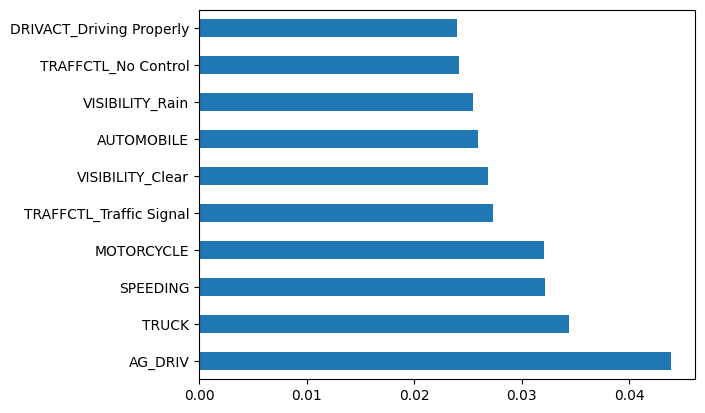

In [40]:
data = temp_df

X = data.iloc[:,0:48]  #independent columns
cols=["ACCNUM","DAY","LATITUDE","LONGITUDE","Hood_ID","STREET1","STREET2","ROAD_CLASS","LOCCOORD","LIGHT","RDSFCOND","ACCLASS","IMPACTYPE","INVTYPE","INVAGE","INJURY","FATAL_NO","INITDIR","MANOEUVER","DRIVCOND","PEDESTRIAN","CYCLIST","PASSENGER","HOUR","MINUTES","YEAR","ACCLOC","WEEKDAY","Hood_Name","Ward_Name","Ward_ID","Division","District","MONTH","VEHTYPE"]
X=X.drop(columns=cols)
X1=X
X1["Hood_Name"]=temp_df['Hood_Name']
X1["District"]=temp_df['District']
print(X1.shape)
print(X.info())
X = pd.get_dummies(X)
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
 #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [41]:
drop_colmns = ['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Ward_Name', 'Ward_ID', 'Hood_ID',
       'Division',  'STREET1', 'STREET2', 'ROAD_CLASS',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND',  'PEDESTRIAN',
       'CYCLIST', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'AUTOMOBILE']
df_ml = temp_df.drop(columns=drop_colmns)
df_ml.columns

Index(['Hood_Name', 'District', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'FATAL'],
      dtype='object')

no idea about next step

In [42]:
#creating Pivot tabe for Alcohol
df1alco = df_ml.groupby(['Hood_Name','ALCOHOL']).size().unstack(fill_value=0)
df1alco.columns = ['ALCOHOL_' + df1alco.columns.astype(str)]

#creating Pivot tabe for Disability
df1disb = df_ml.groupby(['Hood_Name','DISABILITY']).size().unstack(fill_value=0)
df1disb.columns = ['DISABILITY_' + df1disb.columns.astype(str)]

#creating Pivot tabe for Speeding
df1speed = df_ml.groupby(['Hood_Name','SPEEDING']).size().unstack(fill_value=0)
df1speed.columns = ['SPEEDING_' + df1speed.columns.astype(str)]

#creating Pivot tabe for AG_driv
df1agdriv = df_ml.groupby(['Hood_Name','AG_DRIV']).size().unstack(fill_value=0)
df1agdriv.columns = ['AG_DRIV_' + df1agdriv.columns.astype(str)]

#creating Pivot tabe for Red Light
df1red = df_ml.groupby(['Hood_Name','REDLIGHT']).size().unstack(fill_value=0)
df1red.columns = ['REDLIGHT_' + df1red.columns.astype(str)]

#concatenate all the pivots
CrashFactors = pd.concat([df1speed,df1agdriv,df1red,df1alco,df1disb],axis=1)

# Combine all pivot tables into a single DataFrame
df1 = CrashFactors
df1 = df1.dropna()
df1

SPEEDING,SPEEDING_0,SPEEDING_1,AG_DRIV_0,AG_DRIV_1,REDLIGHT_0,REDLIGHT_1,ALCOHOL_0,ALCOHOL_1,DISABILITY_0,DISABILITY_1
Hood_Name,,,,,,,,,,
Agincourt North (129),114,27,67,74,127,14,136,5,133,8
Agincourt South-Malvern West (128),89,29,67,51,116,2,118,0,118,0
Alderwood (20),46,5,19,32,38,13,43,8,51,0
Annex (95),154,9,101,62,161,2,159,4,163,0
Banbury-Don Mills (42),78,44,22,100,118,4,105,17,119,3
...,...,...,...,...,...,...,...,...,...,...
Wychwood (94),72,4,31,45,74,2,76,0,76,0
Yonge-Eglinton (100),47,1,30,18,48,0,44,4,45,3
Yonge-St.Clair (97),44,0,40,4,44,0,44,0,42,2


In [43]:
#Run this command if you want to see whole dataframe.
#pd.set_option('display.max_rows', None)

#Run this commmand to reset you default display setting.
#pd.reset_option('^display.', silent=True)

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib

In [45]:
scaler = StandardScaler()
Sum_of_squared_distances = []
std_scale = scaler.fit(df1)
print(df1.shape)
df_transformed = std_scale.transform(df1)
pca = PCA(n_components=3)
pca = pca.fit(df_transformed)
X = pca.transform(df_transformed)
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed)
    Sum_of_squared_distances.append(km.inertia_)

(140, 10)


c:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

no need of below given cell

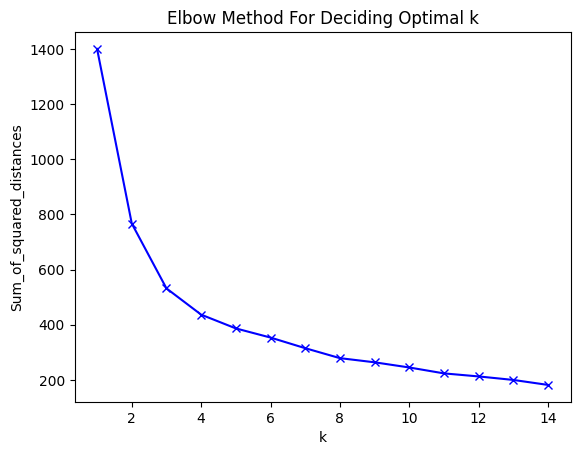

In [46]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Deciding Optimal k')
plt.show()

3.2.2 Cluster analysis using Kmeans in general
In this section, Kmean was applied to all other column besides those mentioned above. But using district instead of hoodname.

In [47]:
from sklearn.cluster import KMeans

-----------------------------------

In [48]:
KSI_CLEAN_data_cluster=temp_df[['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
        'Hood_ID',
        'District',  
        'VISIBILITY', 'LIGHT', 'RDSFCOND', 
        'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY','FATAL']]

In [49]:
KSI_CLEAN_data_cluster= pd.get_dummies(KSI_CLEAN_data_cluster, columns=['VISIBILITY','RDSFCOND','LIGHT','District'])

In [50]:
KSI_CLEAN_data_cluster.shape

(12557, 53)

In [51]:
# create kmeans object
kmeans = KMeans(n_clusters=4)
# fit kmeans object to data
kmeans.fit(X)
# print location of clusters learned by kmeans object
#cluster_center=pd.DataFrame(kmeans.cluster_centers_,columns=X.columns)

# save new clusters for chart
#y_km = kmeans.fit_predict(X)

c:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [52]:
#cluster_center.describe()

3.2.3 Cluster analysis using Kmeans checking neighborhood using raw data with selected columns
Here 'SPEEDING' and 'AG_DRIV' were selected as for investigation of Neighborhood

It is Concluded that the Highest number of accidents causing fatalities by speeding and aggressive driving in Toronto District from 2007-2017, based on Kmeans, was occurred more in['Toronto East York']
when hoodname was chozen as input, 'South Parkdale (85)' 'West Humber-Clairville (1)' and 'Wexford/Maryvale (119)' rank top 3 out of all hoods as highest numbers of accidents that related to speeding and aggressive driving based on cluster that labeled as 2 and its relative pivot table for speeding and aggressive fatal numbers.
From cluster that labeled as 0 and its relative pivot table for speeding and aggressive fatal numbers, 'Elms-Old Rexdale (5)', 'Kingsway South (15)','Broadview North (57)', 'Church-Yonge Corridor (75)','Englemount-Lawrence (32)', 'Highland Creek (134)','Hillcrest Village (48)', 'Lansing-Westgate (38)','O'Connor-Parkview (54)', 'Oakwood Village (107)' are the least accidents reported among all regions

In [53]:
drop_colmns = ['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Ward_Name', 'Ward_ID', 'Hood_ID',
       'Division', 'Hood_Name', 'STREET1', 'STREET2', 'ROAD_CLASS',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND',  'PEDESTRIAN',
       'CYCLIST', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'AUTOMOBILE']
dk_dropped = clean_df.drop(columns=drop_colmns)
dk = dk_dropped[dk_dropped['FATAL']==1]
dk.columns

Index(['District', 'OFFSET', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE',
       'CYCACT', 'CYCCOND', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'FATAL'],
      dtype='object')

In [54]:
dk_g21=X1.groupby(['District','SPEEDING']).size().to_frame('count').reset_index()
dkspeed1 = dk_g21.pivot(index='District',columns='SPEEDING',values='count')
print(dkspeed1)
dk_g21=X1.groupby(['District','AG_DRIV']).size().to_frame('count').reset_index()
dkagdriv1 = dk_g21.pivot(index='District',columns='AG_DRIV',values='count')

dk_g21=X1.groupby(['District','REDLIGHT']).size().to_frame('count').reset_index()
dfred1 = dk_g21.pivot(index='District',columns='REDLIGHT',values='count')

dk_g21=X1.groupby(['District','ALCOHOL']).size().to_frame('count').reset_index()
dkalco1 = dk_g21.pivot(index='District',columns='ALCOHOL',values='count')

dk_g21=X1.groupby(['District','DISABILITY']).size().to_frame('count').reset_index()
dkdisb1 = dk_g21.pivot(index='District',columns='DISABILITY',values='count')

dk_g21=X1.groupby(['District','TRUCK']).size().to_frame('count').reset_index()
dktruck1 = dk_g21.pivot(index='District',columns='TRUCK',values='count')


dk_g21=X1.groupby(['District','TRSN_CITY_VEH']).size().to_frame('count').reset_index()
dktrsn1 = dk_g21.pivot(index='District',columns='TRSN_CITY_VEH',values='count')


dk_g21=X1.groupby(['District','AUTOMOBILE']).size().to_frame('count').reset_index()
dkauto1 = dk_g21.pivot(index='District',columns='AUTOMOBILE',values='count')



dknew = dkspeed1
print(dknew)


dknew = dknew.dropna()

#dknew.columns = ['SPEEDING', 'AG_DRIV','TRUCK','AUTOMOBILE','TRSN_CITY_VEH','ALCOHOL','REDLIGHT']

dknew[0]= dkagdriv1[1]
dknew['TRUCK']=dktruck1[1]
dknew['AUTOMOBILE']=dkauto1[1]
dknew['TRSN_CITY_VEH']=dktrsn1[1]
dknew['ALCOHOL']=dkalco1[1]
dknew['REDLIGHT']=dfred1[1]
dknew
print(dknew)
dknew.columns.names = ['Cause'] 
dknew.columns = ['SPEEDING', 'AG_DRIV','TRUCK','AUTOMOBILE','TRSN_CITY_VEH','ALCOHOL','REDLIGHT']
print(dknew)

SPEEDING              0    1
District                    
Etobicoke York     2411  593
No District          13    0
North York         1946  453
Scarborough        2394  546
Toronto East York  3602  598
SPEEDING              0    1
District                    
Etobicoke York     2411  593
No District          13    0
North York         1946  453
Scarborough        2394  546
Toronto East York  3602  598
SPEEDING              0    1  TRUCK  AUTOMOBILE  TRSN_CITY_VEH  ALCOHOL  \
District                                                                  
Etobicoke York     1643  593    233        2769            204      133   
No District           7    0      0          13              0        0   
North York         1344  453    150        2236            124       93   
Scarborough        1565  546    157        2718            157      150   
Toronto East York  1860  598    256        3632            332      166   

SPEEDING           REDLIGHT  
District                     
Etobicok

In [55]:
dk_g2=dk.groupby(['District','SPEEDING']).size().to_frame('count').reset_index()
dk_g2

,District,SPEEDING,count
0,Etobicoke York,0,270
1,Etobicoke York,1,109
2,North York,0,271
3,North York,1,111
4,Scarborough,0,387
5,Scarborough,1,116
6,Toronto East York,0,374
7,Toronto East York,1,77


c:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=3425)
   0
0  1
1  0
2  1
3  1
4  1


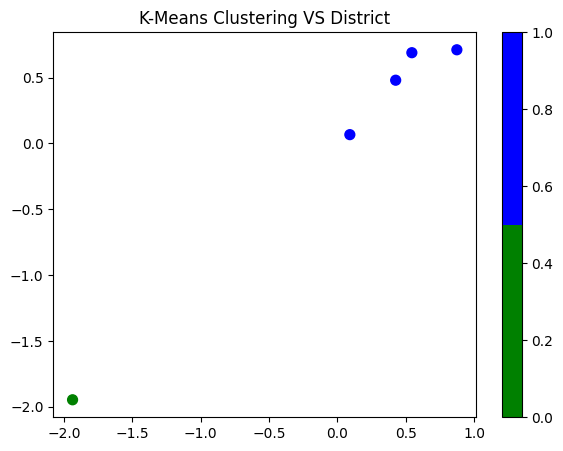

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib

scaler = StandardScaler()
Sum_of_squared_distances = []
std_scale1 = scaler.fit(dknew)
dk_transformed1 = std_scale1.transform(dknew)
from sklearn.cluster import KMeans
kmeansk = KMeans(n_clusters=2,random_state=3425)
colors = ['green','blue']


plt.figure(figsize=(15, 5)) 

ax = plt.subplot(121)
kc =kmeansk.fit(dk_transformed1)
print(kc)
label = pd.DataFrame(kc.labels_)
print(label)
dk_result =pd.DataFrame(dk_transformed1)
# label = label.sort_values(by=0)
dk_result['label']=label

scatterd = plt.scatter(dk_result[0],dk_result[1],
                     c=list(label.iloc[:,0]), cmap=matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering VS District')

plt.colorbar(scatterd)

In [57]:
print('We Conclude that the Highest number of accidents causing fatalitiesby speeding and aggresive driving in Toronto District from 2007-2017, based on Kmeans, occured in')
neighborhoodsk = dknew.index

neighborhoodsk = np.array(neighborhoodsk)
print(neighborhoodsk[np.where(label[0]==1)])

We Conclude that the Highest number of accidents causing fatalitiesby speeding and aggresive driving in Toronto District from 2007-2017, based on Kmeans, occured in
['Etobicoke York' 'North York' 'Scarborough' 'Toronto East York']


In [58]:
ClusterLabelk=pd.DataFrame(kmeansk.labels_) 
ClusterLabelk['label']=dknew.index
ClusterLabelk

,0,label
0,1,Etobicoke York
1,0,No District
2,1,North York
3,1,Scarborough
4,1,Toronto East York


In [59]:
drop_colmns = ['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Ward_Name', 'Ward_ID', 'Hood_ID',
       'Division',  'STREET1', 'STREET2', 'ROAD_CLASS',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND',  'PEDESTRIAN',
       'CYCLIST', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'AUTOMOBILE']
df_dropped = clean_df.drop(columns=drop_colmns)
df = df_dropped[df_dropped['FATAL']==1]
df.columns

Index(['Hood_Name', 'District', 'OFFSET', 'PEDTYPE', 'PEDACT', 'PEDCOND',
       'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'SPEEDING', 'AG_DRIV', 'REDLIGHT',
       'ALCOHOL', 'DISABILITY', 'FATAL'],
      dtype='object')

In [60]:
dk_g21=X1.groupby(['Hood_Name','SPEEDING']).size().to_frame('count').reset_index()
dkspeed1 = dk_g21.pivot(index='Hood_Name',columns='SPEEDING',values='count')

dk_g21=X1.groupby(['Hood_Name','AG_DRIV']).size().to_frame('count').reset_index()
dkagdriv1 = dk_g21.pivot(index='Hood_Name',columns='AG_DRIV',values='count')

dk_g21=X1.groupby(['Hood_Name','REDLIGHT']).size().to_frame('count').reset_index()
dfred1 = dk_g21.pivot(index='Hood_Name',columns='REDLIGHT',values='count')

dk_g21=X1.groupby(['Hood_Name','ALCOHOL']).size().to_frame('count').reset_index()
dkalco1 = dk_g21.pivot(index='Hood_Name',columns='ALCOHOL',values='count')

dk_g21=X1.groupby(['Hood_Name','DISABILITY']).size().to_frame('count').reset_index()
dkdisb1 = dk_g21.pivot(index='Hood_Name',columns='DISABILITY',values='count')

dk_g21=X1.groupby(['Hood_Name','TRUCK']).size().to_frame('count').reset_index()
dktruck1 = dk_g21.pivot(index='Hood_Name',columns='TRUCK',values='count')


dk_g21=X1.groupby(['Hood_Name','TRSN_CITY_VEH']).size().to_frame('count').reset_index()
dktrsn1 = dk_g21.pivot(index='Hood_Name',columns='TRSN_CITY_VEH',values='count')


dk_g21=X1.groupby(['Hood_Name','AUTOMOBILE']).size().to_frame('count').reset_index()
dkauto1 = dk_g21.pivot(index='Hood_Name',columns='AUTOMOBILE',values='count')


dfnew = dkspeed1
print(dknew)


dknew = dknew.dropna()

#dknew.columns = ['SPEEDING', 'AG_DRIV','TRUCK','AUTOMOBILE','TRSN_CITY_VEH','ALCOHOL','REDLIGHT']

dfnew[0]= dkagdriv1[1]
dfnew['TRUCK']=dktruck1[1]
dfnew['AUTOMOBILE']=dkauto1[1]
dfnew['TRSN_CITY_VEH']=dktrsn1[1]
dfnew['ALCOHOL']=dkalco1[1]
dfnew['REDLIGHT']=dfred1[1]
print(dfnew)
dfnew.columns.names = ['Cause'] 
dfnew.columns = ['SPEEDING', 'AG_DRIV','TRUCK','AUTOMOBILE','TRSN_CITY_VEH','ALCOHOL','REDLIGHT']
print(dfnew)

                   SPEEDING  AG_DRIV  TRUCK  AUTOMOBILE  TRSN_CITY_VEH  \
District                                                                 
Etobicoke York         1643      593    233        2769            204   
No District               7        0      0          13              0   
North York             1344      453    150        2236            124   
Scarborough            1565      546    157        2718            157   
Toronto East York      1860      598    256        3632            332   

                   ALCOHOL  REDLIGHT  
District                              
Etobicoke York         133       277  
No District              0         0  
North York              93       218  
Scarborough            150       316  
Toronto East York      166       248  
SPEEDING                              0   1  TRUCK  AUTOMOBILE  TRSN_CITY_VEH  \
Hood_Name                                                                       
Agincourt North (129)                74  27   

In [61]:
dfnew.columns.names = ['Cause'] 
dfnew = dfnew.fillna(0)
print(dfnew.shape)

#dfnew.columns = ['SPEEDING', 'AG_DRIV']
dfnew.nlargest(10,'SPEEDING')

(140, 7)


Cause,SPEEDING,AG_DRIV,TRUCK,AUTOMOBILE,TRSN_CITY_VEH,ALCOHOL,REDLIGHT
Hood_Name,,,,,,,
West Humber-Clairville (1),243,97,77,394,21,22,58
Waterfront Communities-The Island (77),220,62,38,407,35,16,50
Bay Street Corridor (76),160,34,20,257,33,3,46
Woburn (137),151,66,16,270,5,26,47
Islington-City Centre West (14),128,50,19,221,9,14,24
Rouge (131),126,61,3,195,6,5,17
Clairlea-Birchmount (120),121,38,7,166,10,10,30
Milliken (130),113,43,13,172,26,8,33
Wexford/Maryvale (119),113,27,17,214,8,2,22


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib

scaler = StandardScaler()
Sum_of_squared_distances = []
std_scale2 = scaler.fit(dfnew)
df_transformed2 = std_scale2.transform(dfnew)
print(df_transformed2.shape)

(140, 7)


c:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(140, 7)
(140, 7)
            0         1         2         3         4         5         6  \
0    0.735221  0.700177 -0.076501  0.808759  0.931402  0.222753  0.616906   
1    0.134508  0.823479 -0.411192  0.465223  0.411377 -0.764126 -0.533374   
2   -0.361734 -0.656141 -0.299628 -0.534154  0.411377  0.814880  0.521050   
3    0.421805 -0.409537  1.485391  0.996143  0.151364  0.025377 -0.533374   
4    1.414288  1.748241  0.369754  0.636991 -0.758680  2.591263 -0.341661   
..        ...       ...       ...       ...       ...       ...       ...   
135 -0.022200 -0.717791 -0.634320 -0.253079  0.541383 -0.764126 -0.533374   
136 -0.727386 -0.902744 -0.634320 -0.659076 -0.498667  0.025377 -0.725088   
137 -1.093037 -0.964395 -0.634320 -0.752767  0.931402 -0.764126 -0.725088   
138  1.623232  0.515225  1.820083  1.308448 -0.108648  0.222753  2.150614   
139  0.343451 -0.347887 -0.411192 -0.003235 -0.368661  0.025377 -0.437517   

     label  
0        3  
1        3  
2        1  
3    

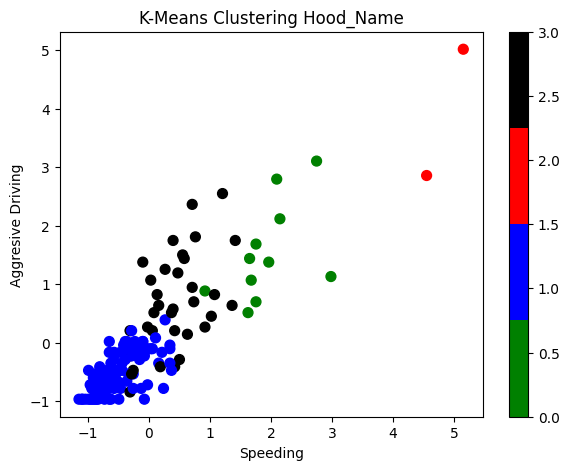

In [63]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,random_state=3425)
colors =  ['green','blue','red','black']


plt.figure(figsize=(15, 5)) 

ax = plt.subplot(121)
kc =kmeans.fit(df_transformed2)
label = pd.DataFrame(kc.labels_)
df_result2 =pd.DataFrame(df_transformed2)
print(df_transformed2.shape)
print(df_result2.shape)
# label = label.sort_values(by=0)
df_result2['label']=label

print(df_result2)
scatter = plt.scatter(df_result2[0],df_result2[1],
                     c=list(label.iloc[:,0]), cmap=matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering Hood_Name')
plt.xlabel('Speeding')
plt.ylabel('Aggresive Driving')

plt.colorbar(scatter)

In [64]:
ClusterLabelh=pd.DataFrame(kmeans.labels_) 
ClusterLabelh['label']=dfnew.index

ClusterLabelh.head(111)

,0,label
0,3,Agincourt North (129)
1,3,Agincourt South-Malvern West (128)
2,1,Alderwood (20)
3,3,Annex (95)
4,3,Banbury-Don Mills (42)
...,...,...
106,1,Runnymede-Bloor West Village (89)
107,1,Rustic (28)
108,3,Scarborough Village (139)
109,3,South Parkdale (85)


In [65]:
print('We Conclude that the Highest number of accidents causing fatalities in Toronto Neighborhoods from 2007-2017, based on Kmeans, occured in')
neighborhoods = dfnew.index
neighborhoods = np.array(neighborhoods)
print(neighborhoods[np.where(label[0]==2)])
print(neighborhoods[np.where(label[0]==0)])
#ksafe = neighborhoods[np.where(label[0]==1)]
#kaccident = neighborhoods[np.where(label[0]==0)]

We Conclude that the Highest number of accidents causing fatalities in Toronto Neighborhoods from 2007-2017, based on Kmeans, occured in
['Waterfront Communities-The Island (77)' 'West Humber-Clairville (1)']
['Bay Street Corridor (76)' 'Clairlea-Birchmount (120)'
 'Dorset Park (126)' 'Dovercourt-Wallace Emerson-Junction (93)'
 'Islington-City Centre West (14)' 'Milliken (130)' 'Rouge (131)'
 'South Riverdale (70)' 'Wexford/Maryvale (119)' 'Woburn (137)'
 'York University Heights (27)']


In [66]:
dfnew.nlargest(3,'SPEEDING')

Cause,SPEEDING,AG_DRIV,TRUCK,AUTOMOBILE,TRSN_CITY_VEH,ALCOHOL,REDLIGHT
Hood_Name,,,,,,,
West Humber-Clairville (1),243,97,77,394,21,22,58
Waterfront Communities-The Island (77),220,62,38,407,35,16,50
Bay Street Corridor (76),160,34,20,257,33,3,46


Looking at cluster that labeled as 2 and its relative pivot table for speeding and aggressive fatal numbers, 'Elms-Old Rexdale (5)', 'Kingsway South (15)','Broadview North (57)', 'Church-Yonge Corridor (75)','Englemount-Lawrence (32)', 'Highland Creek (134)','Hillcrest Village (48)', 'Lansing-Westgate (38)','O'Connor-Parkview (54)', 'Oakwood Village (107)' are the least accidents reported among all regions and are in cluster 0.

In [67]:
dfnew.nsmallest(10,'SPEEDING')


Cause,SPEEDING,AG_DRIV,TRUCK,AUTOMOBILE,TRSN_CITY_VEH,ALCOHOL,REDLIGHT
Hood_Name,,,,,,,
Danforth (66),2,0,0,16,0,4,0
Kingsway South (15),4,0,0,21,0,3,0
Yonge-St.Clair (97),4,0,0,33,13,0,0
Lambton Baby Point (114),6,0,0,9,0,0,0
Playter Estates-Danforth (67),8,0,0,18,3,3,0
Pleasant View (46),8,8,0,30,0,0,0
Blake-Jones (69),9,0,0,29,0,0,2
Highland Creek (134),9,4,0,25,0,0,4
Morningside (135),10,3,0,25,0,2,4


In [68]:
dfnew.nsmallest(10,'SPEEDING').index

CategoricalIndex(['Danforth (66)', 'Kingsway South (15)',
                  'Yonge-St.Clair (97)', 'Lambton Baby Point (114)',
                  'Playter Estates-Danforth (67)', 'Pleasant View (46)',
                  'Blake-Jones (69)', 'Highland Creek (134)',
                  'Morningside (135)', 'Woodbine-Lumsden (60)'],
                 categories=['Agincourt North (129)', 'Agincourt South-Malvern West (128)', 'Alderwood (20)', 'Annex (95)', ..., 'Yonge-Eglinton (100)', 'Yonge-St.Clair (97)', 'York University Heights (27)', 'Yorkdale-Glen Park (31)'], ordered=False, dtype='category', name='Hood_Name')